In [20]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

In [3]:
#informação das colunas
df = pd.read_csv('telecom_churn.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB
None


In [4]:
#resumo dos dados numéricos
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


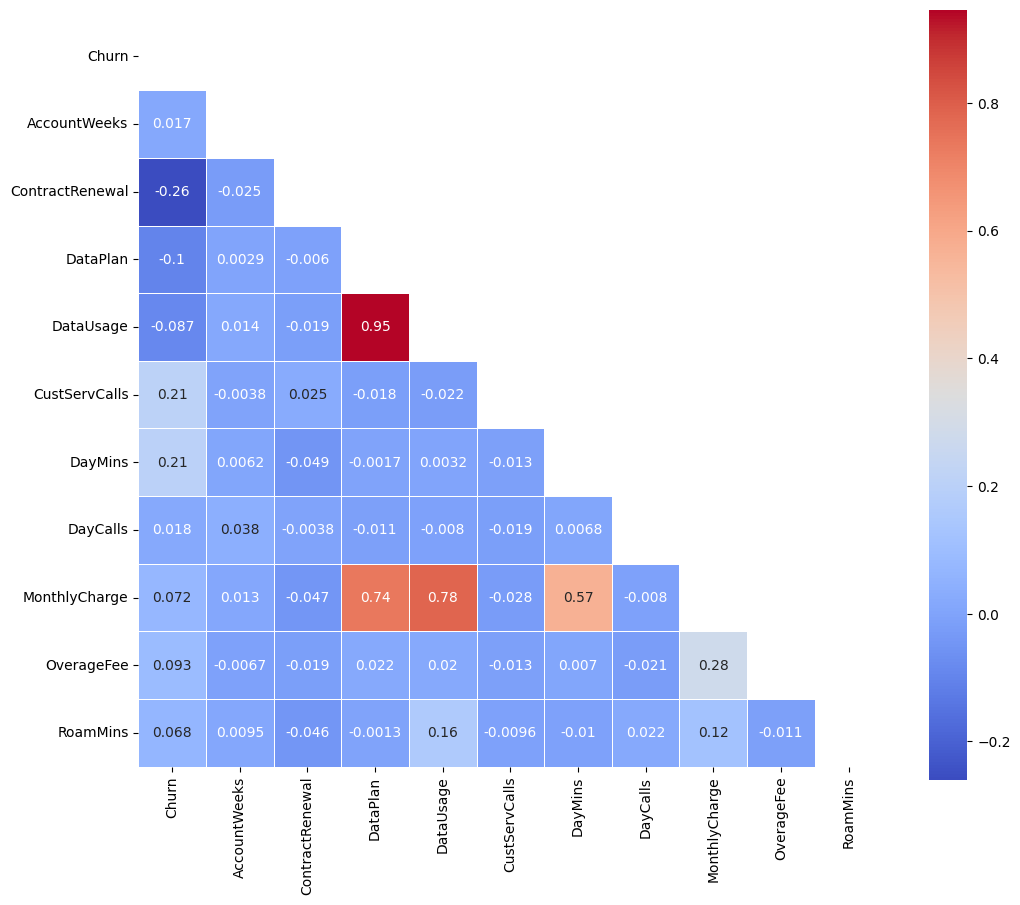

In [5]:
#matriz de correlação
corr = df.corr()

#mask para limitar o triângulo superior
mask = np.triu(np.ones_like(corr, dtype=bool))

#tamanho do plot
plt.figure(figsize=(12, 10))

#heatmap com a mask para exibir apenas o triangulo inf
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', square=True, linewidths=0.5)

#plotando
plt.show()

C:\Users\mf_gu\AppData\Local\Temp\ipykernel_4372\2846925727.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='colorblind')


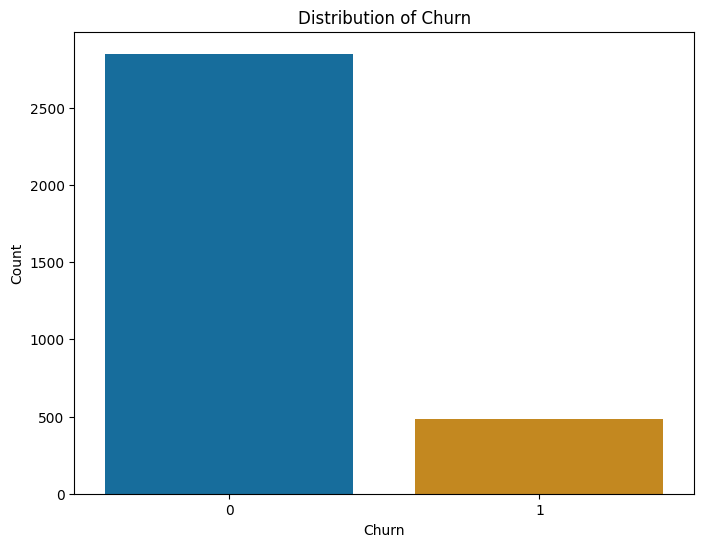

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df, palette='colorblind')
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

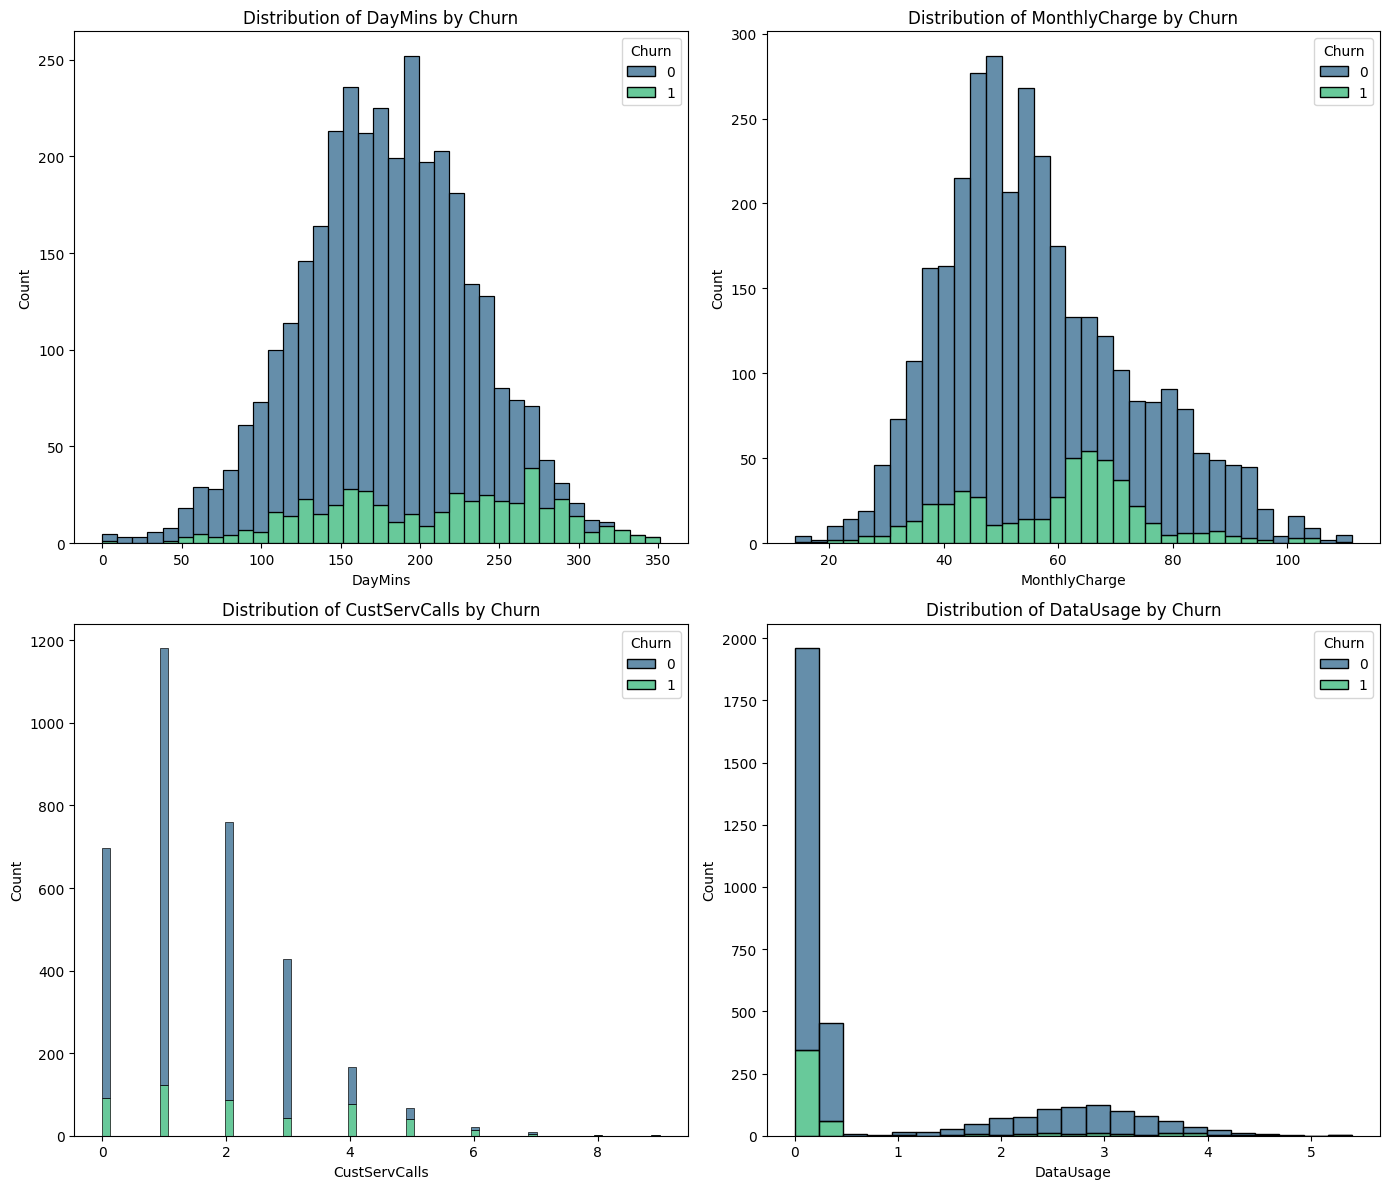

In [7]:
# Suprimindo alertas específicos
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

# Tratando infinitos
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Setando figura do matplotlib
plt.figure(figsize=(14, 12))

# média de tempo diário por mês
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='DayMins', hue='Churn', multiple='stack', palette='viridis')
plt.title('Distribution of DayMins by Churn')

# média de valor mensal
plt.subplot(2, 2, 2)
sns.histplot(data=df, x='MonthlyCharge', hue='Churn', multiple='stack', palette='viridis')
plt.title('Distribution of MonthlyCharge by Churn')

# ligações para o atendimento
plt.subplot(2, 2, 3)
sns.histplot(data=df, x='CustServCalls', hue='Churn', multiple='stack', palette='viridis')
plt.title('Distribution of CustServCalls by Churn')

# Dados mensais usados (GB)
plt.subplot(2, 2, 4)
sns.histplot(data=df, x='DataUsage', hue='Churn', multiple='stack', palette='viridis')
plt.title('Distribution of DataUsage by Churn')

plt.tight_layout()
plt.show()

C:\Users\mf_gu\AppData\Local\Temp\ipykernel_4372\2218495606.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=feature, palette='viridis')
C:\Users\mf_gu\AppData\Local\Temp\ipykernel_4372\2218495606.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=feature, palette='viridis')
C:\Users\mf_gu\AppData\Local\Temp\ipykernel_4372\2218495606.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=feature, palette='viridis')
C:\Users\mf_gu\AppData\Local\Temp\ipykernel_4372\2218495606.p

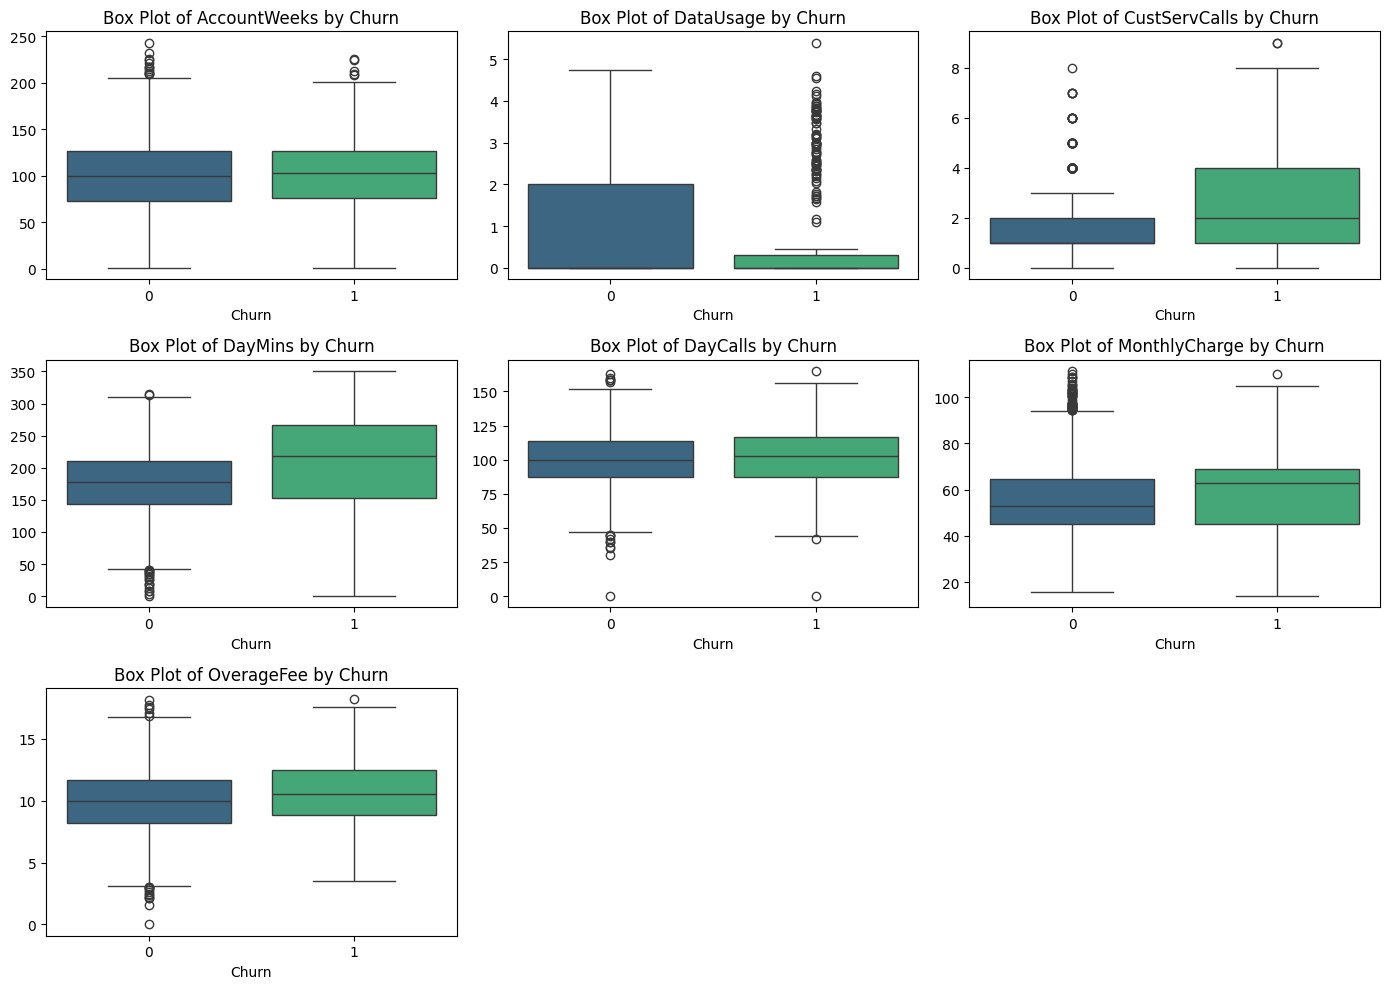

In [8]:
numerical_features = ['AccountWeeks', 'DataUsage', 'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee']

plt.figure(figsize=(14, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=df, x='Churn', y=feature, palette='viridis')
    plt.title(f'Box Plot of {feature} by Churn')
    plt.xlabel('Churn')
    plt.ylabel('')

plt.tight_layout()
plt.show()

Data  Prep

In [9]:
# Duração media da ligação
df['AvgCallDuration'] = df['DayMins'] / df['DayCalls']

# Replace resultados infinitos da div/0
df['AvgCallDuration'] = df['AvgCallDuration'].replace([np.inf, -np.inf], 0)

# Verificando nova construção
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,AvgCallDuration
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0,2.410000
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7,1.313821
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2,2.135088
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6,4.216901
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1,1.475221


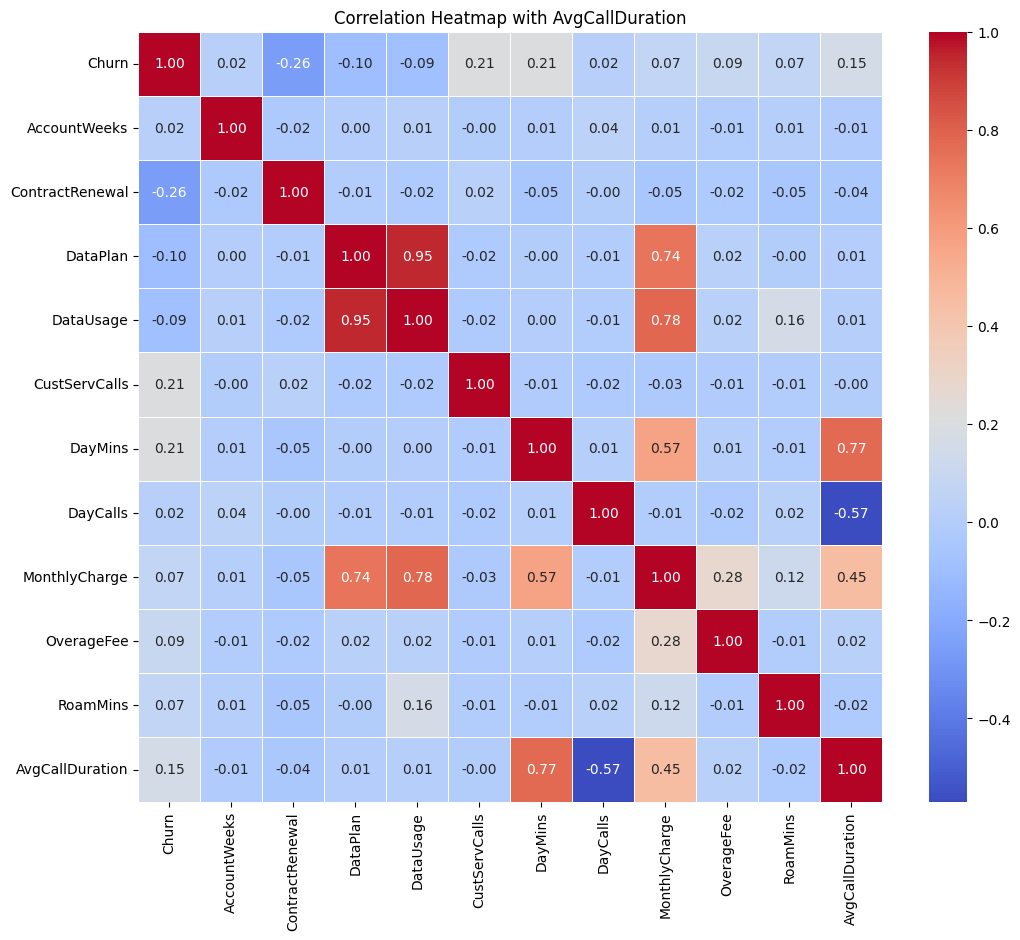

In [10]:
# Incluindo duração media da ligação no mapa de correlação
correlation_matrix = df[['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage', 'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins', 'AvgCallDuration']].corr()

# Plotando
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap with AvgCallDuration')
plt.show()

In [11]:
# Select features based on EDA and newly derived features
features = ['AccountWeeks', 'ContractRenewal', 'DataPlan', 'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins', 'AvgCallDuration']
target = 'Churn'

# Separate the features (X) and the target variable (y)
X = df[features]
y = df[target]

In [21]:
# Check for NaN values in the original dataset
nan_counts = df[features].isnull().sum()
print("NaN values in each column of the original dataset:")
print(nan_counts)

# Handle NaN values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Check for NaN values in the imputed dataset
X_df_imputed = pd.DataFrame(X, columns=features)
nan_counts_imputed = X_df_imputed.isnull().sum()
print("NaN values in each column of the imputed dataset:")
print(nan_counts_imputed)

NaN values in each column of the original dataset:
AccountWeeks       0
ContractRenewal    0
DataPlan           0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
AvgCallDuration    2
dtype: int64
NaN values in each column of the imputed dataset:
AccountWeeks       0
ContractRenewal    0
DataPlan           0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
AvgCallDuration    0
dtype: int64


In [22]:
# Standardize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the scaled data back into a DataFrame for easier manipulation
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f'Training set shape: X={X_train.shape}, y={y_train.shape}')
print(f'Testing set shape: X={X_test.shape}, y={y_test.shape}')

Training set shape: X=(2666, 10), y=(2666,)
Testing set shape: X=(667, 10), y=(667,)


In [23]:
# Define the hyperparameter space
param_distributions = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=param_distributions, 
    n_iter=50,  # Number of random combinations
    cv=3,  # Cross-Validation splits
    verbose=2, 
    random_state=42, 
    n_jobs=-1
)

# Conduct Randomized Search
random_search.fit(X_train, y_train)

# Display best parameters and best accuracy
print("Best parameters found: ", random_search.best_params_)
print("Best accuracy found: ", random_search.best_score_)

# Make predictions with the best model
best_rf = random_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# Evaluate the model
print("Random Forest Model with Hyperparameter Optimization")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters found:  {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}
Best accuracy found:  0.9354844157993764
Random Forest Model with Hyperparameter Optimization
Accuracy: 0.9325337331334332
Confusion Matrix:
 [[559   7]
 [ 38  63]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       566
           1       0.90      0.62      0.74       101

    accuracy                           0.93       667
   macro avg       0.92      0.81      0.85       667
weighted avg       0.93      0.93      0.93       667



In [24]:
# Model without parameter optimization
# Initialize the Random Forest model
rf_no_opt = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model
rf_no_opt.fit(X_train, y_train)

# Make predictions
y_pred_rf_no_opt = rf_no_opt.predict(X_test)

# Evaluate the model
print("\nRandom Forest Model without Hyperparameter Optimization")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_no_opt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_no_opt))
print("Classification Report:\n", classification_report(y_test, y_pred_rf_no_opt))


Random Forest Model without Hyperparameter Optimization
Accuracy: 0.9265367316341829
Confusion Matrix:
 [[557   9]
 [ 40  61]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96       566
           1       0.87      0.60      0.71       101

    accuracy                           0.93       667
   macro avg       0.90      0.79      0.84       667
weighted avg       0.92      0.93      0.92       667



In [25]:
# Initialize the Gradient Boosting model
gb = GradientBoostingClassifier(random_state=42, n_estimators=100)

# Train the model
gb.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb.predict(X_test)

# Evaluate the model
print("Gradient Boosting Model")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))

Gradient Boosting Model
Accuracy: 0.9325337331334332
Confusion Matrix:
 [[557   9]
 [ 36  65]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       566
           1       0.88      0.64      0.74       101

    accuracy                           0.93       667
   macro avg       0.91      0.81      0.85       667
weighted avg       0.93      0.93      0.93       667



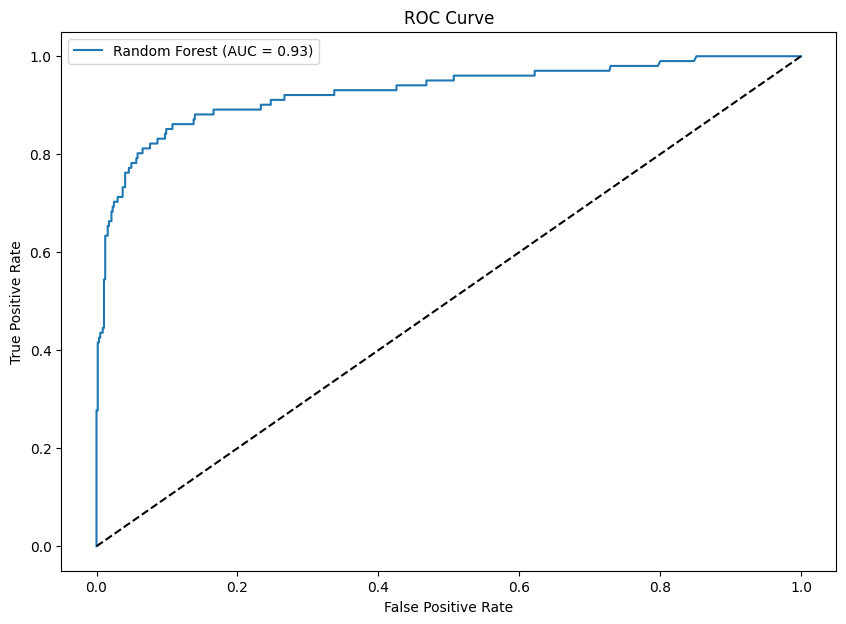

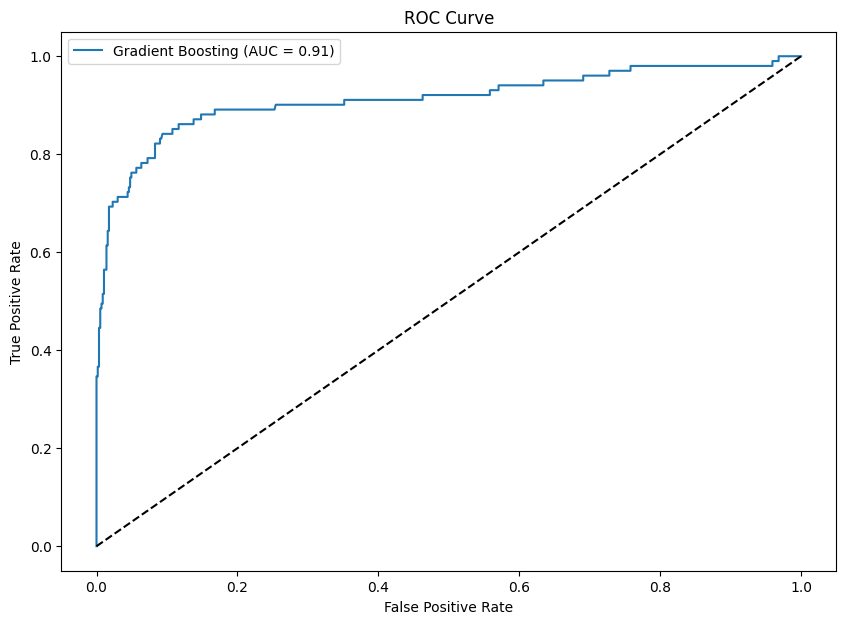

In [26]:
# ROC Curve for Random Forest with Hyperparameter Optimization
proba_best_rf = best_rf.predict_proba(X_test)[:, 1]
fpr_best_rf, tpr_best_rf, _ = roc_curve(y_test, proba_best_rf)
auc_best_rf = roc_auc_score(y_test, proba_best_rf)

plt.figure(figsize=(10, 7))
plt.plot(fpr_best_rf, tpr_best_rf, label=f'Random Forest (AUC = {auc_best_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# ROC Curve for Gradient Boosting
proba_gb = gb.predict_proba(X_test)[:, 1]
fpr_gb, tpr_gb, _ = roc_curve(y_test, proba_gb)
auc_gb = roc_auc_score(y_test, proba_gb)

plt.figure(figsize=(10, 7))
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {auc_gb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

In [27]:
# Example customer data
example_customer = {
    'AccountWeeks': 12,
    'ContractRenewal': 0,
    'DataPlan': 1,
    'CustServCalls': 1,
    'DayMins': 60,
    'DayCalls': 2,
    'MonthlyCharge': 75.0,
    'OverageFee': 10.0,
    'RoamMins': 15.0,
    'AvgCallDuration': 60 / 2,  # DayMins / DayCalls
}

# Convert the example data to a DataFrame
example_customer_df = pd.DataFrame([example_customer])

# Verify that the feature names match those used during model training
expected_features = [
    'AccountWeeks', 'ContractRenewal', 'DataPlan', 'CustServCalls',
    'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins', 'AvgCallDuration'
]

# Reorder the columns to match the expected feature order
example_customer_df = example_customer_df[expected_features]

# Preprocess the example data
example_customer_imputed = imputer.transform(example_customer_df)  # Impute missing values
example_customer_scaled = scaler.transform(example_customer_imputed)  # Standardize the data

# Make the prediction using the Gradient Boosting model
example_prediction = gb.predict(example_customer_scaled)
example_prediction_proba = gb.predict_proba(example_customer_scaled)

# Output the prediction
churn_prediction = 'Churn' if example_prediction[0] == 1 else 'No Churn'
churn_probability = example_prediction_proba[0][1]  # Probability of churn

print(f"Prediction: {churn_prediction}")
print(f"Probability of Churn: {churn_probability:.2f}")

Prediction: Churn
Probability of Churn: 0.93


In [28]:
# assuming 1 month has ~4 weeks
df['AccountMonths'] = df['AccountWeeks'] / 4
df['CustomerLifetimeValue'] = df['MonthlyCharge'] * df['AccountMonths']

# Calculate the average Customer Lifetime Value
average_clv = df['CustomerLifetimeValue'].mean()

print(f"The average customer lifetime value is: ${average_clv:.2f}")

The average customer lifetime value is: $1424.67
